# Aanlysis data of Gamble IDs dataset. 

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn
from matplotlib import pyplot

In [3]:
import jieba

In [4]:
import gensim

In [5]:
max_num = int(1e6)  # we use most 10^6 data rows

In [6]:
ls

Data Analysis.ipynb  database/            requirements.txt


In [315]:
csv_data = pd.read_csv('database/gamble_id_table.csv', nrows=max_num)

In [12]:
csv_data.head()

,task_id,cust_id,user_id,verify_date,if_gamble,new_nickname,old_nickname
0,20140721101073801A,2088002000032177,2.088002e+15,2014-07-22 12:01:01,0,NaN,NaN
1,20170709011626161A,2088002000595434,2.088012e+15,2017-07-24 17:33:39,0,NaN,NaN
2,20170709011626161A,2088002000595434,2.088002e+15,2017-07-24 17:33:39,0,文创汇,NaN
3,20170709011626161A,2088002000595434,2.088112e+15,2017-07-24 17:33:39,0,NaN,NaN
4,20170103006667101A,2088002001662810,2.088223e+15,2017-01-24 11:43:46,0,上善若水,上善若水


In [9]:
len(csv_data)

339888

In [15]:
gamble_data = csv_data[csv_data['if_gamble'] == 1]

In [16]:
len(gamble_data)

129257

### Probability of gamble in all csv_data

In [17]:
len(gamble_data) / len(csv_data)

0.3802929200207127

In [ ]:
place_holder = 'nan'

In [316]:
csv_data.fillna('N')

,task_id,cust_id,user_id,verify_date,if_gamble,new_nickname,old_nickname
0,20140721101073801A,2088002000032177,2.088e+15,2014-07-22 12:01:01,0,N,N
1,20170709011626161A,2088002000595434,2.08801e+15,2017-07-24 17:33:39,0,N,N
2,20170709011626161A,2088002000595434,2.088e+15,2017-07-24 17:33:39,0,文创汇,N
3,20170709011626161A,2088002000595434,2.08811e+15,2017-07-24 17:33:39,0,N,N
4,20170103006667101A,2088002001662810,2.08822e+15,2017-01-24 11:43:46,0,上善若水,上善若水
5,20170103006667101A,2088002001662810,2.088e+15,2017-01-24 11:43:46,0,磨铁,磨铁
6,20160715001667341A,2088002002854874,2.0887e+15,2016-07-19 17:00:24,0,N,N
7,20160715001667341A,2088002002854874,2.088e+15,2016-07-19 17:00:24,0,yxrs,yxrs
8,20170103006667251A,2088002005999323,2.088e+15,2017-01-24 11:45:45,0,若西,若西
9,20170103006667251A,2088002005999323,2.08851e+15,2017-01-24 11:45:45,0,若西,若西


In [313]:
csv_data['new_nickname'].tolist()
cs

[nan,
 nan,
 '文创汇',
 nan,
 '上善若水',
 '磨铁',
 nan,
 'yxrs',
 '若西',
 '若西',
 '若西',
 '宇',
 nan,
 '封号多年',
 '亚马逊🈲拉法',
 '亚马逊🈲🈲🈲',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '无水乙醇',
 '6039197',
 'algea01',
 nan,
 '975008',
 nan,
 '掉线',
 '仁武',
 '大旧衰',
 nan,
 '凯',
 nan,
 nan,
 nan,
 nan,
 '高俊聪',
 nan,
 nan,
 nan,
 nan,
 nan,
 '云云',
 nan,
 '米兰炫-陈石磊',
 nan,
 '鸿鑫',
 '无所不成',
 '夏天',
 nan,
 nan,
 nan,
 nan,
 '宸',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '宜军',
 nan,
 '拦路虎',
 '水浒1961',
 '庆恩',
 '迈巴赫-醒龙',
 '帅得惊动党',
 '全球通',
 '¥@“”',
 nan,
 nan,
 nan,
 '暖💋',
 '暖💋',
 nan,
 '牧野清风',
 '智光',
 nan,
 nan,
 '媛媛',
 nan,
 nan,
 nan,
 nan,
 '快马轻裘',
 '粘豆包',
 '七阿婆',
 '会海',
 nan,
 nan,
 '三妹',
 nan,
 nan,
 '叶琼琼',
 nan,
 '叶琼琼',
 nan,
 '水之音',
 'yelv野驴',
 nan,
 '水之音礼品网',
 '进侣',
 nan,
 nan,
 '江华',
 '一墨小子',
 '华',
 nan,
 '帝林(收到钱请勿转任何人)',
 '坑爹的基金',
 nan,
 nan,
 nan,
 '小强',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

### Probability of gamble in all the not none nickname user.

In [30]:
not_none_nickname = csv_data[~pd.isna(csv_data['new_nickname']) & ~pd.isna(csv_data['old_nickname'])]

In [32]:
not_none_nickname.head()

,task_id,cust_id,user_id,verify_date,if_gamble,new_nickname,old_nickname
4,20170103006667101A,2088002001662810,2.088223e+15,2017-01-24 11:43:46,0,上善若水,上善若水
5,20170103006667101A,2088002001662810,2.088002e+15,2017-01-24 11:43:46,0,磨铁,磨铁
7,20160715001667341A,2088002002854874,2.088002e+15,2016-07-19 17:00:24,0,yxrs,yxrs
8,20170103006667251A,2088002005999323,2.088002e+15,2017-01-24 11:45:45,0,若西,若西
9,20170103006667251A,2088002005999323,2.088512e+15,2017-01-24 11:45:45,0,若西,若西


In [33]:
len(not_none_nickname)

70948

In [34]:
not_none_nickname_probability = len(not_none_nickname) / len(csv_data)

In [35]:
not_none_nickname_probability

0.20873934943275432

In [36]:
gamble_when_not_none_nickname = not_none_nickname[not_none_nickname['if_gamble'] == 1]

In [38]:
gamble_given_not_none_nickname_probability = len(gamble_when_not_none_nickname) / len(not_none_nickname)

In [39]:
gamble_given_not_none_nickname_probability

0.37397812482381465

In [41]:
gamble_when_not_none_nickname

,task_id,cust_id,user_id,verify_date,if_gamble,new_nickname,old_nickname
13,20170821012461771A,2088002006860363,2.088423e+15,2017-08-25 19:40:40,1,封号多年,poker
69,20161226006415931M,2088002086734631,2.088002e+15,2017-01-12 16:38:16,1,拦路虎,拦路虎
200,20160518000975521A,2088002451604288,2.088512e+15,2016-05-23 10:56:44,1,雄鹰。本号不收米,阿峰
201,20160518000975521A,2088002451604288,2.088002e+15,2016-05-23 10:56:44,1,雪山飞狐😺,阿坚
237,20171105005521481A,2088002806950299,2.088202e+15,2017-11-07 09:15:29,1,👑大大大大大大🐱🐱宝🍭,豆芽菜的爱
241,20160531001109611A,2088002843272512,2.088003e+15,2016-06-15 16:29:02,1,LoBo,1站通
289,20161013004102941A,2088012480191206,2.088222e+15,2016-11-02 13:55:06,1,信誉收款号,秋
291,20161013004102941A,2088012480191206,2.088223e+15,2016-11-02 13:55:06,1,乐,默默地
292,20161013004102941A,2088012480191206,2.088223e+15,2016-11-02 13:55:06,1,哈喽微信收款号,默默
310,20170821012455391A,2088012890364515,2.088522e+15,2017-08-23 09:43:56,1,停用,坚强


In [43]:
len(not_none_nickname)

70948

In [44]:
all_the_text = ""

In [49]:
all_the_text = "".join(not_none_nickname['new_nickname'].tolist() + not_none_nickname['old_nickname'].tolist()) 

In [53]:
len(all_the_text)

438972

In [54]:
all_the_text[:100]

'上善若水磨铁yxrs若西若西若西宇封号多年无水乙醇6039197algea01975008仁武大旧衰凯高俊聪米兰炫-陈石磊宸宜军拦路虎庆恩智光媛媛快马轻裘粘豆包七阿婆会海三妹叶琼琼叶琼琼进侣江华华帝林'

In [55]:
from collections import Counter

In [312]:
len(all_the_text)

438972

In [236]:
words_counter = Counter(all_the_text)

In [237]:
len(words_counter)

5822

In [58]:
words_count_as_list = list(words_counter.values())

In [60]:
words_count_as_list = sorted(words_count_as_list)

In [62]:
words_count_as_list.reverse()

In [311]:
len(words_counter)

5822

In [63]:
words_count_as_list

[7521,
 5287,
 4441,
 4422,
 3976,
 3628,
 3226,
 3045,
 2705,
 2619,
 2451,
 2424,
 2416,
 2372,
 2313,
 2275,
 2246,
 2213,
 2173,
 2074,
 2060,
 2055,
 2035,
 1924,
 1902,
 1895,
 1841,
 1799,
 1781,
 1775,
 1756,
 1748,
 1746,
 1729,
 1719,
 1661,
 1618,
 1608,
 1602,
 1583,
 1576,
 1510,
 1461,
 1455,
 1438,
 1434,
 1432,
 1414,
 1388,
 1357,
 1343,
 1300,
 1300,
 1296,
 1275,
 1260,
 1259,
 1257,
 1227,
 1221,
 1202,
 1191,
 1191,
 1170,
 1128,
 1111,
 1096,
 1086,
 1080,
 1077,
 1039,
 1035,
 978,
 968,
 964,
 945,
 944,
 936,
 934,
 931,
 930,
 916,
 910,
 907,
 897,
 876,
 870,
 870,
 860,
 832,
 823,
 820,
 819,
 818,
 807,
 805,
 792,
 779,
 777,
 769,
 764,
 764,
 763,
 761,
 759,
 758,
 756,
 752,
 748,
 747,
 744,
 741,
 741,
 738,
 736,
 726,
 725,
 718,
 710,
 703,
 701,
 701,
 699,
 696,
 695,
 695,
 689,
 682,
 678,
 675,
 673,
 668,
 663,
 661,
 659,
 654,
 653,
 648,
 645,
 644,
 643,
 642,
 641,
 641,
 640,
 638,
 635,
 632,
 629,
 625,
 622,
 618,
 614,
 612,
 609

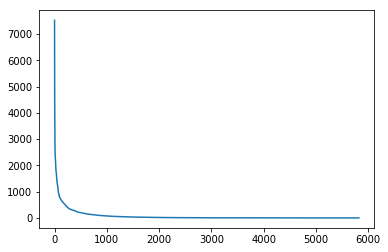

In [67]:
pyplot.plot(words_count_as_list)

In [78]:
high_frequence_chars = filter(lambda k_v: k_v[1] > 1000, words_counter.items())

In [79]:
high_frequence_chars = {k: v for k, v in high_frequence_chars}

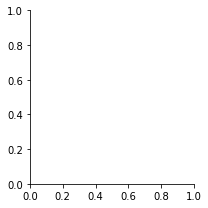

In [66]:
seaborn.FacetGrid(words_count_as_list)

In [65]:
%matplotlib inline

### The probability of gamble that name contains the high frequence chars.

In [108]:
high_frequence_chars_by_pandas_recognize = "|".join(high_frequence_chars.keys())

In [110]:
high_frequence_chars_by_pandas_recognize[:100]

'y|r|s|号|6|0|3|9|1|7|a|l|g|e|5|8|大|陈|阿|海|华|林|人|小|伟|不|飞|丽|宝|o|明|心|乐|i|n|b|用|一|.|爱|的|财|天|生|A|2|哥|龙|c|d|'

In [126]:
cond = csv_data['new_nickname'].str.contains(high_frequence_chars_by_pandas_recognize) == True

In [156]:
cond2 = csv_data['old_nickname'].str.contains(high_frequence_chars_by_pandas_recognize) == True

In [169]:
name_contain_high_frequence = csv_data[cond]

In [170]:
len(name_contain_high_frequence[name_contain_high_frequence['if_gamble'] == 1]) / len(name_contain_high_frequence)

0.48996841778755323

> therefore, the probability of gamble given the name contain top 1k characters is 0.489

#### The stricker for test gamble for top 500 character. 

In [188]:
top_500_high_frequence_chars = filter(lambda k_v: k_v[1] > 1000, words_counter.items())

In [195]:
top_500_high_frequence_chars_dict = {k:v for k, v in top_500_high_frequence_chars}

In [196]:
top_500_high_frequence_chars_by_pandas_recognize = "|".join(top_500_high_frequence_chars_dict.keys())

In [197]:
cond = csv_data['new_nickname'].str.contains(top_500_high_frequence_chars_by_pandas_recognize) == True

In [198]:
name_contain_high_frequence = csv_data[cond]

In [199]:
len(name_contain_high_frequence[name_contain_high_frequence['if_gamble'] == 1]) / len(name_contain_high_frequence)

0.48996841778755323

In [285]:
len(csv_data[cond1 | cond2])

32895

In [305]:
def get_probability_of_name_contains_frequence_char(top=100):  
    fre = words_count_as_list[top]
    top_dict = {k:v for k, v in filter(lambda k_v: k_v[1] > fre, words_counter.items())}.keys()
    cond1 = csv_data['new_nickname'].str.contains("|".join(top_dict)) == True
    cond2 = csv_data['old_nickname'].str.contains("|".join(top_dict)) == True
    cond3 = csv_data['if_gamble'] == 1
    P_G_and_H = len(csv_data[cond3 & (cond1 | cond2)])
    P_H = len(csv_data[cond1 | cond2])
    #print(P_G_and_H)
    #print(P_H)
    return P_G_and_H / P_H

In [310]:
for i in range(500):
    tmp = i * 2
    try:
        prob = get_probability_of_name_contains_frequence_char(tmp)
        print(tmp, prob)
    except Exception as e:
        continue

0 0.48997201328135465
2 0.43293755496921726
4 0.4161692263112141
6 0.46791875955448786
8 0.4839030866246266
10 0.515032679738562
12 0.5197159990948178
14 0.5150636548143072
16 0.5425814731631297
18 0.5460357500108729
20 0.5445356141679114
22 0.5423885246216855
24 0.5420567905489497
26 0.5470007281145567
28 0.54937201865185
30 0.5452988264025507
32 0.5411184210526315
34 0.5458817200898649
36 0.5407219161822443
38 0.5393981196863145
40 0.5331035892643322
42 0.5331625598556188
44 0.5291671987853505
46 0.528326927862416
48 0.5381747253330502
50 0.539537640782454
52 0.5372748629600627
54 0.48997201328135465
56 0.48997201328135465
58 0.48997201328135465
60 0.48997201328135465
62 0.48997201328135465
64 0.48997201328135465
66 0.48997201328135465
68 0.48997201328135465
70 0.48997201328135465
72 0.48997201328135465
74 0.48997201328135465
76 0.48997201328135465
78 0.48997201328135465
80 0.48997201328135465
82 0.48997201328135465
84 0.48997201328135465
86 0.48997201328135465
88 0.48997201328135465

/Users/minquan/anaconda3/envs/find-gamble/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/Users/minquan/anaconda3/envs/find-gamble/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


482 0.48997201328135465
484 0.48997201328135465
486 0.48997201328135465
488 0.48997201328135465
490 0.48997201328135465
492 0.48997201328135465
494 0.48997201328135465
496 0.48997201328135465
498 0.48997201328135465
500 0.48997201328135465
502 0.48997201328135465
504 0.48997201328135465
506 0.48997201328135465
508 0.48997201328135465
510 0.48997201328135465
512 0.48997201328135465
514 0.48997201328135465
516 0.48997201328135465
518 0.48997201328135465
520 0.48997201328135465
522 0.48997201328135465
524 0.48997201328135465
526 0.48997201328135465
528 0.48997201328135465
530 0.48997201328135465
532 0.48997201328135465
534 0.48997201328135465
536 0.48997201328135465
538 0.48997201328135465
540 0.48997201328135465
542 0.48997201328135465
544 0.48997201328135465
546 0.48997201328135465
548 0.48997201328135465
550 0.48997201328135465
552 0.48997201328135465
554 0.48997201328135465
556 0.48997201328135465
558 0.48997201328135465
560 0.48997201328135465
562 0.48997201328135465
564 0.4899720132

KeyboardInterrupt: 

In [243]:
words_count_as_list[100]

764

In [244]:
len(list(filter(lambda k_v: k_v[1] > 764, words_counter.items())))

100

In [245]:
prob = get_probability_of_name_contains_frequence_char(764)

In [246]:
prob

0.48997201328135465

In [206]:
for i in range(100):
    prob = get_probability_of_name_contains_frequence_char(i*100)
    print('Pro(gamble|top_words={})={}'.format(i*100, prob))

error: nothing to repeat at position 3364

In [317]:
from itertools import product

In [318]:
s1 = '苍井空'
s2 = '孙立文'
g = 1

In [320]:
for c1, c2, _g in product(s1, s2, [g]): 
    print(c1, _g)
    print(c2, _g)

苍 1
孙 1
苍 1
立 1
苍 1
文 1
井 1
孙 1
井 1
立 1
井 1
文 1
空 1
孙 1
空 1
立 1
空 1
文 1


In [326]:
cd ..

/Users/minquan/Workspace


In [329]:
cd FindGamble/

/Users/minquan/Workspace/FindGamble


In [331]:
import pandas as pd

In [ ]:
pd.read_